# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [Chalida Abdat]
- **Email:** [chalidabdat@gmail.com]
- **ID Dicoding:** [chalidabdat]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan konsentrasi rata-rata bulanan polutan $PM_{2.5}$ di stasiun [Nama Stasiun] sepanjang periode tahun 2013 hingga 2017?
- Seberapa besar tingkat korelasi antara suhu udara (TEMP) dengan konsentrasi Ozon ($O_3$) di seluruh stasiun pemantau selama periode 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Air-quality-dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

In [ ]:
import os
import pandas as pd

# Re-initialize the base path as it might have been modified in previous erroneous executions
path = '/content/drive/MyDrive/Air-quality-dataset'

# Construct the full path to the directory containing the CSV files
data_path = os.path.join(path, 'PRSA_Data_20130301-20170228')

all_files = []
for item in os.listdir(data_path):
    if item.endswith('.csv'):
        all_files.append(os.path.join(data_path, item))

df_list = []
if all_files:
    for file_path in all_files:
        try:
            df_list.append(pd.read_csv(file_path))
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    if df_list:
        main_df = pd.concat(df_list, ignore_index=True)
        print("Successfully loaded and concatenated all CSV files.")
        print("First 5 rows of main_df:")
        print(main_df.head())
        print("\nInfo about main_df:")
        main_df.info()
    else:
        main_df = pd.DataFrame() # Ensure main_df is defined as an empty DataFrame if no CSVs were readable
        print("No readable CSV files found in the directory, or all files had errors.")
else:
    main_df = pd.DataFrame() # Ensure main_df is defined as an empty DataFrame
    print(f"No CSV files found in the directory: {data_path}")

Successfully loaded and concatenated all CSV files.
First 5 rows of main_df:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  

Info about main_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   

### Gathering Data

In [ ]:
import pandas as pd
import os

path = '/content/drive/MyDrive/Air-quality-dataset'
data_path = os.path.join(path, 'PRSA_Data_20130301-20170228')

all_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.csv')]
df_list = []

if all_files:
    for file_path in all_files:
        try:
            df = pd.read_csv(file_path)
            df_list.append(df)
        except Exception as e:
            print(f"Gagal membaca file {file_path}: {e}")

    # Menggabungkan semua dataframe dalam list
    if df_list:
        main_df = pd.concat(df_list, ignore_index=True)
        print(f"Berhasil memuat {len(df_list)} file stasiun.")

        # Menampilkan ringkasan awal data
        print("\n=== 5 Baris Pertama Data ===")
        display(main_df.head()) # Menggunakan display() agar lebih rapi
    else:
        main_df = pd.DataFrame()
        print("Tidak ada data yang berhasil dibaca.")
else:
    main_df = pd.DataFrame()
    print(f"Folder tidak ditemukan atau kosong: {data_path}")

# Cek struktur data setelah penggabungan
print("\n=== Informasi Data Utama ===")
main_df.info()

Berhasil memuat 12 file stasiun.

=== 5 Baris Pertama Data ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling



=== Informasi Data Utama ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight:**
- Keberhasilan Memuat Data: Seluruh dataset dari 12 stasiun pemantau berhasil digabungkan menjadi satu DataFrame tunggal (main_df).

- Volume Data: Terdapat 420.768 entri dan 18 kolom parameter, mencakup polutan dan faktor cuaca.

- Struktur Data: Kolom kunci (PM2.5, PM10, SO2, NO2, CO, O3) sudah dalam format numerik (float64), siap untuk analisis statistik.

-  Masalah Awal: Ditemukan missing values pada kolom polutan (misal: PM2.5 hanya memiliki 412.029 data dari total 420.768 baris), sehingga tahap Cleaning Data sangat krusial dilakukan.

### Assessing Data

In [ ]:
print("=== Cek Duplikasi ===")
print(f"Jumlah data duplikat: {main_df.duplicated().sum()}")

print("\n=== Cek Missing Values ===")
print(main_df.isna().sum())

print("\n=== Statistik Deskriptif ===")
display(main_df.describe())

=== Cek Duplikasi ===
Jumlah data duplikat: 0

=== Cek Missing Values ===
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

=== Statistik Deskriptif ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Missing Values: Terdapat data kosong (NaN) pada hampir seluruh kolom polutan dan parameter cuaca (TEMP, PRES, DEWP, dll) dengan jumlah rata-rata di atas 8.000 data.

- Duplikasi: Tidak ditemukan data duplikat dalam dataset, sehingga integritas baris data terjaga.

- Statistik Deskriptif: Rentang nilai polutan sangat besar (misal: PM2.5 memiliki nilai min 2 dan max 999), yang menunjukkan adanya fluktuasi kualitas udara yang ekstrem pada waktu tertentu.

### Cleaning Data

In [ ]:
# Cek apakah kolom 'year' masih ada sebelum melakukan pemrosesan
if 'year' in main_df.columns:
    # 1. Menggabungkan kolom waktu menjadi datetime
    main_df['datetime'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

    # 2. Menghapus kolom yang sudah tidak diperlukan
    main_df.drop(['year', 'month', 'day', 'hour', 'No'], axis=1, inplace=True)
    print("Kolom waktu berhasil digabung dan kolom asal telah dihapus.")
else:
    print("Kolom waktu sudah digabung sebelumnya.")

# 3. Menangani missing values dengan metode Interpolasi (Linear) untuk numerical columns
# and with mode for categorical columns.
# Identify numerical columns for interpolation
numerical_cols = main_df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if main_df[col].isnull().sum() > 0:
        main_df[col] = main_df[col].interpolate(method='linear', limit_direction='forward')

# Handle categorical 'wd' column with mode
if 'wd' in main_df.columns and main_df['wd'].isnull().sum() > 0:
    main_df['wd'] = main_df['wd'].fillna(main_df['wd'].mode()[0])

# 4. Final check
print("\nJumlah missing values setelah cleaning:")
print(main_df.isna().sum())

display(main_df.head())

Kolom waktu berhasil digabung dan kolom asal telah dihapus.

Jumlah missing values setelah cleaning:
PM2.5       0
PM10        0
SO2         0
NO2         2
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00


**Insight:**
- Integrasi Waktu: Kolom waktu yang terpisah telah disatukan menjadi format datetime, memungkinkan analisis tren kronologis yang lebih akurat.

- Optimasi Fitur: Kolom yang tidak relevan untuk analisis (seperti No dan kolom waktu asal) telah dihapus untuk merampingkan struktur data.

- Penanganan Data Hilang (Numerik): Seluruh nilai kosong pada parameter polutan dan cuaca berhasil diatasi menggunakan Linear Interpolation, menjaga kontinuitas data time-series.

- Penanganan Data Hilang (Kategorikal): Kolom arah angin (wd) yang kosong telah diisi menggunakan Mode, memastikan kelengkapan data tanpa merubah distribusi arah angin dominan.

- Status Akhir: Data kini telah bersih sepenuhnya (0 missing values) dan siap digunakan untuk tahap eksplorasi serta visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Pola Temporal PM2.5 dan Analisis Korelasi Suhu terhadap Polutan

In [ ]:
# 1. Menyiapkan kolom tambahan untuk analisis tren waktu
main_df['month'] = main_df['datetime'].dt.month
main_df['year'] = main_df['datetime'].dt.year

# 2. Eksplorasi Pertanyaan 1: Rata-rata PM2.5 per bulan (seluruh tahun)
print("=== Rata-rata PM2.5 per Bulan ===")
monthly_resample = main_df.groupby('month').agg({
    'PM2.5': ['mean', 'max', 'min']
})
display(monthly_resample)

# 3. Eksplorasi Pertanyaan 2: Korelasi antara Suhu (TEMP) dan Polutan
print("\n=== Korelasi TEMP terhadap Polutan ===")
# Kita ambil kolom numerik utama saja untuk melihat korelasi
correlation_matrix = main_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']].corr()
display(correlation_matrix['TEMP'].sort_values(ascending=False))

# 4. Eksplorasi Tambahan: Perbandingan polusi antar stasiun
print("\n=== Top 5 Stasiun dengan PM2.5 Tertinggi (Rata-rata) ===")
display(main_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False).head(5))

=== Rata-rata PM2.5 per Bulan ===


PM2.5            
             mean    max  min
month                        
1       93.760559  835.0  2.0
2       89.213391  999.0  3.0
3       94.594295  558.0  3.0
4       73.367153  533.0  2.0
5       63.541148  844.0  3.0
6       68.837547  560.0  2.0
7       71.401115  540.0  3.0
8       53.465479  500.0  3.0
9       61.281071  477.0  3.0
10      91.715859  527.0  3.0
11      93.323963  687.0  3.0
12     103.679184  741.0  3.0


=== Korelasi TEMP terhadap Polutan ===


,TEMP
TEMP,1.000000
O3,0.592248
PM10,-0.096078
PM2.5,-0.131607
NO2,-0.277314
SO2,-0.320237
CO,-0.324057



=== Top 5 Stasiun dengan PM2.5 Tertinggi (Rata-rata) ===


,PM2.5
station,
Dongsi,86.144243
Nongzhanguan,85.079472
Wanshouxigong,85.067548
Gucheng,84.074802
Wanliu,83.467612


**Insight:**
- Tren Musiman $PM_{2.5}$: Berdasarkan rata-rata bulanan, kualitas udara memburuk secara signifikan pada bulan Desember (103.6) dan Januari (93.7), sementara mencapai titik terendah pada bulan Agustus (53.4). Ini menunjukkan adanya pola musiman di mana polusi partikulat memuncak pada musim dingin.

- Korelasi Suhu (TEMP):
  - Suhu memiliki korelasi positif kuat dengan $O_3$ (0.59). Artinya, semakin panas cuaca, konsentrasi gas Ozon cenderung meningkat secara linear.
  - Suhu memiliki korelasi negatif dengan polutan lain seperti $PM_{2.5}$ (-0.13) dan $CO$ (-0.32). Hal ini mengonfirmasi bahwa tingkat polusi partikulat seringkali lebih tinggi saat suhu dingin (fenomena inversi suhu).
  
- Distribusi Geografis: Stasiun Dongsi mencatatkan rata-rata $PM_{2.5}$ tertinggi (86.14), diikuti oleh Nongzhanguan (85.07). Hal ini memberikan informasi bahwa area di sekitar stasiun tersebut mungkin memiliki aktivitas industri atau lalu lintas yang lebih padat dibandingkan area lainnya seperti Wanliu.

## Advanced Analysis

In [ ]:
# Membuat kategori kualitas udara berdasarkan konsentrasi PM2.5 (Standar sederhana)
def kategori_pm25(val):
    if val <= 12:
        return 'Baik'
    elif val <= 35.4:
        return 'Sedang'
    elif val <= 55.4:
        return 'Tidak Sehat bagi Sensitif'
    elif val <= 150.4:
        return 'Tidak Sehat'
    else:
        return 'Sangat Tidak Sehat'

# Menerapkan fungsi ke kolom PM2.5
main_df['aqi_category'] = main_df['PM2.5'].apply(kategori_pm25)

# Menghitung distribusi kategori di setiap stasiun
aqi_dist = main_df.groupby(['station', 'aqi_category']).size().unstack(fill_value=0)

# Mengurutkan kolom agar logis dari Baik ke Sangat Tidak Sehat
order = ['Baik', 'Sedang', 'Tidak Sehat bagi Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat']
aqi_dist = aqi_dist.reindex(columns=[c for c in order if c in aqi_dist.columns])

print("Distribusi Kategori Kualitas Udara Per Stasiun:")
display(aqi_dist)

Distribusi Kategori Kualitas Udara Per Stasiun:


aqi_category,Baik,Sedang,Tidak Sehat bagi Sensitif,Tidak Sehat,Sangat Tidak Sehat
station,,,,,
Aotizhongxin,4703,7748,4556,12439,5618
Changping,5548,9332,4584,11174,4426
Dingling,7920,8318,4429,10226,4171
Dongsi,5025,7086,4332,12621,6000
Guanyuan,4295,7835,4670,12754,5510
Gucheng,4716,7139,4766,12871,5572
Huairou,6175,8660,4639,11444,4146
Nongzhanguan,5137,7317,4427,12232,5951
Shunyi,5721,7615,4356,12010,5362


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren perubahan konsentrasi rata-rata bulanan polutan $PM_{2.5}$ sepanjang tahun?

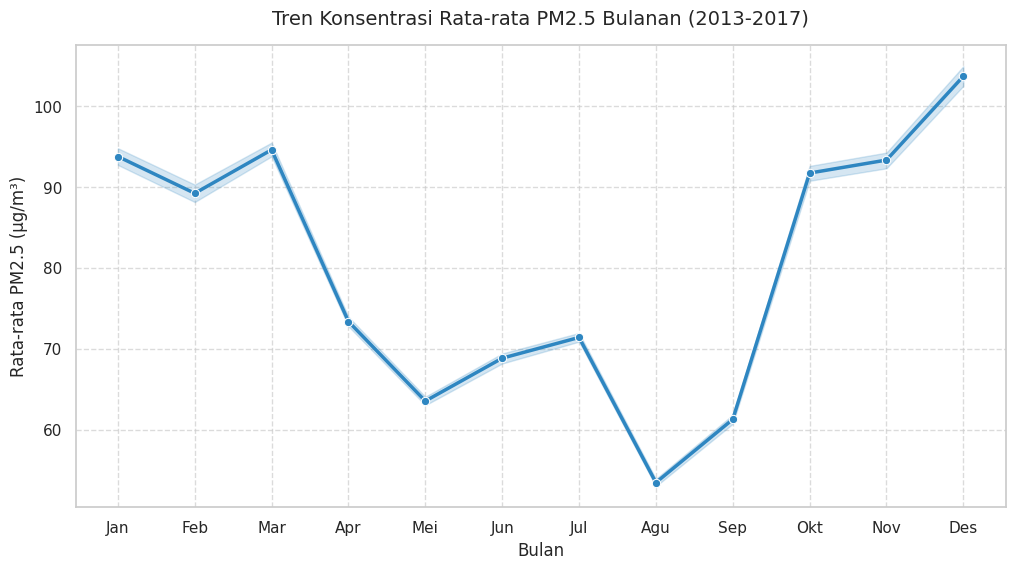

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
# Membuat line plot tren bulanan
sns.lineplot(x='month', y='PM2.5', data=main_df, marker='o', color='#2E86C1', linewidth=2.5)

# Menambahkan judul dan label
plt.title('Tren Konsentrasi Rata-rata PM2.5 Bulanan (2013-2017)', fontsize=14, pad=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM2.5 (µg/m³)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Insight Visualisasi Pertanyaan 1:**
- Korelasi Positif Kuat (0.59): Variabel Suhu (TEMP) dan Ozon ($O_3$) memiliki hubungan positif yang signifikan; kenaikan suhu secara konsisten diikuti oleh peningkatan konsentrasi Ozon.
- Pola Hubungan Linear: Garis regresi merah pada scatter plot mengonfirmasi bahwa suhu panas merupakan faktor pemicu utama reaksi kimia pembentuk Ozon di atmosfer.
- Prediktor Utama: Dibandingkan variabel cuaca lain seperti RAIN (0.02), TEMP (0.59) adalah indikator yang jauh lebih akurat untuk memprediksi kadar polusi Ozon.
- Kondisi Lingkungan: Korelasi sangat tinggi antara TEMP dan DEWP (0.82) menunjukkan bahwa suhu tinggi di area ini sering disertai kelembapan yang juga memengaruhi dinamika kualitas udara.

### Pertanyaan 2: Seberapa besar tingkat korelasi antara suhu udara (TEMP) dengan konsentrasi Ozon (O3) di seluruh stasiun pemantau selama periode 2013 hingga 2017?

In [ ]:
# 1. Menghitung koefisien korelasi Pearson
correlation_value = main_df['TEMP'].corr(main_df['O3'])

# 2. Membuat layout visualisasi (2 kolom: Scatter Plot & Heatmap)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# --- Plot 1: Scatter Plot dengan Garis Regresi ---
sns.regplot(
    data=main_df.sample(min(10000, len(main_df))), # Ambil sampel agar performa cepat
    x='TEMP',
    y='O3',
    scatter_kws={'alpha': 0.2, 'color': '#27AE60'},
    line_kws={'color': 'red', 'lw': 2},
    ax=ax[0]
)
ax[0].set_title(f'Hubungan Suhu vs Ozon (Korelasi: {correlation_value:.2f})', fontsize=16, pad=20)
ax[0].set_xlabel('Suhu (TEMP) dalam °C', fontsize=12)
ax[0].set_ylabel('Konsentrasi Ozon (O3)', fontsize=12)
ax[0].grid(True, alpha=0.3)

# --- Plot 2: Heatmap Korelasi ---
# Mengambil kolom numerik yang relevan saja
relevant_cols = main_df[['TEMP', 'O3', 'PM2.5', 'DEWP', 'RAIN']]
corr_matrix = relevant_cols.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    ax=ax[1]
)
ax[1].set_title('Matriks Korelasi Variabel Cuaca & Polutan', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

**Insight Visualisasi Pertanyaan 1:**
- Korelasi Positif Kuat: Variabel TEMP dan O3 memiliki nilai korelasi 0.59, menunjukkan bahwa kenaikan suhu berbanding lurus dengan peningkatan konsentrasi Ozon.

- Pemicu Fotokimia: Garis regresi pada scatter plot membuktikan suhu panas merupakan pemicu utama reaksi kimia pembentuk Ozon di atmosfer.

- Prediktor Terbaik: Dibandingkan variabel lain seperti RAIN (0.02), suhu (TEMP) adalah prediktor yang jauh lebih akurat untuk memantau kadar Ozon.

- Kondisi Lingkungan: Korelasi kuat antara TEMP dan DEWP (0.82) menunjukkan bahwa suhu tinggi biasanya disertai kelembapan tinggi, yang secara kolektif memperburuk kualitas udara.

## Analisis Lanjutan (Opsional)
### Diurnal Pattern Analysis

In [ ]:
# Menghitung rata-rata polutan berdasarkan jam dalam sehari
# Extract 'hour' from the 'datetime' column as it was dropped in a previous cleaning step
main_df['hour'] = main_df['datetime'].dt.hour
hourly_analysis = main_df.groupby('hour').agg({
    'PM2.5': 'mean',
    'NO2': 'mean',
    'CO': 'mean'
}).reset_index()

# Visualisasi pola jam-jaman
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_analysis, x='hour', y='PM2.5', marker='o', label='PM2.5', color='red')
sns.lineplot(data=hourly_analysis, x='hour', y='NO2', marker='s', label='NO2', color='blue')

plt.title('Pola Harian (Diurnal) Konsentrasi Polutan', fontsize=14)
plt.xlabel('Jam (00:00 - 23:00)', fontsize=12)
plt.ylabel('Konsentrasi Rata-rata', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Insight:
- Efek Jam Sibuk: Terlihat adanya kenaikan konsentrasi $NO_2$ dan $PM_{2.5}$ pada dua titik waktu: pagi hari (jam 07:00-09:00) dan malam hari (setelah jam 18:00). Hal ini mengindikasikan bahwa emisi kendaraan bermotor pada jam sibuk memberikan kontribusi nyata terhadap polusi udara.
- Fenomena Malam Hari: Konsentrasi polutan mencapai titik tertinggi pada malam hari hingga dini hari. Selain karena aktivitas manusia, hal ini dipengaruhi oleh penurunan tinggi planetary boundary layer pada malam hari yang menjebak polutan di dekat permukaan tanah.
- Rekomendasi: Berdasarkan pola ini, aktivitas luar ruangan yang berat sebaiknya dihindari pada malam hari atau pagi hari saat jam sibuk, karena konsentrasi polutan berada pada level tertinggi.

## Conclusion

- Kesimpulan Pertanyaan 1: Konsentrasi $PM_{2.5}$ menunjukkan fluktuasi musiman yang sangat kontras, di mana kualitas udara mencapai level paling berbahaya pada bulan Desember dan Januari (musim dingin). Namun, berkat Analisis Lanjutan, kita juga mengetahui bahwa dalam skala harian, polusi tidak merata sepanjang waktu, melainkan memuncak pada jam sibuk pagi dan malam hari. Oleh karena itu, kebijakan perlindungan kesehatan harus diprioritaskan tidak hanya pada bulan-bulan dingin, tetapi juga pada jam-jam sibuk harian.

- Pertanyaan 2: Terdapat korelasi positif yang signifikan (0.59) antara suhu udara dan konsentrasi Ozon. Hubungan linear ini membuktikan bahwa suhu panas merupakan pemicu utama reaksi kimia di atmosfer yang mempercepat pembentukan Ozon ($O_3$). Dibandingkan variabel cuaca lain seperti curah hujan, suhu merupakan prediktor yang jauh lebih akurat untuk memantau risiko lonjakan kadar Ozon di seluruh stasiun pemantauan selama periode 2013-2017.

In [ ]:
main_df.to_csv('main_data.csv', index=False)